In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [10]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [12]:
def plot_images(images, labels, class_names, rows=3, cols=3):
    fig = plt.figure(figsize=(12, 12), dpi=100)  # زيادة الحجم والدقة
    for i in range(rows * cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], interpolation='bilinear')
        plt.title(class_names[labels[i][0]], fontsize=12, pad=10)
        plt.axis('off')
    plt.tight_layout(pad=3.0)  # زيادة المسافة بين الصور
    plt.show()

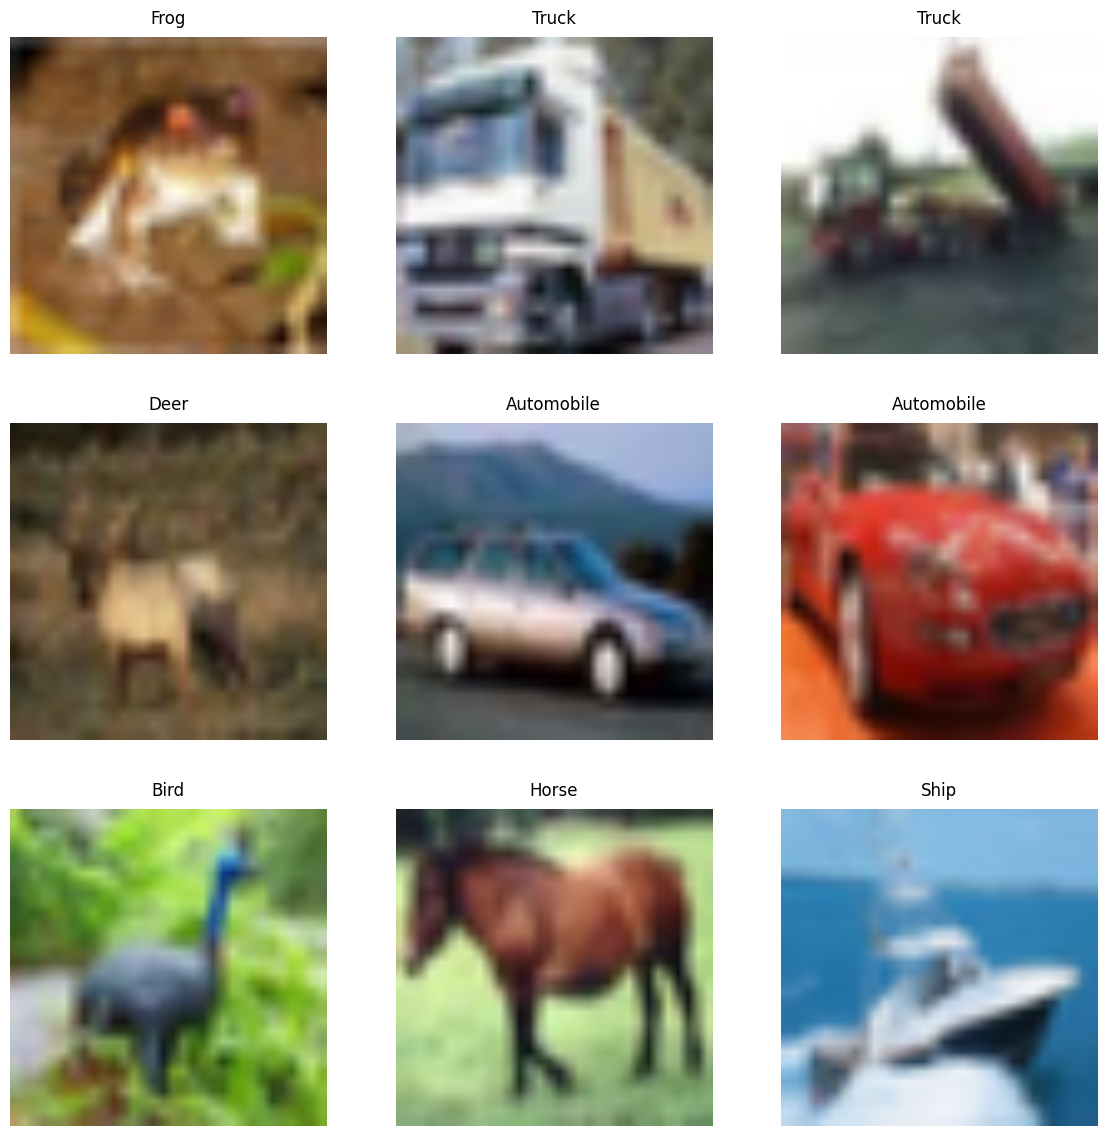

In [13]:
plot_images(train_images, train_labels, class_names)

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7298 - loss: 0.7647 - val_accuracy: 0.6878 - val_loss: 0.9071
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.7486 - loss: 0.7214 - val_accuracy: 0.7077 - val_loss: 0.8646
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7611 - loss: 0.6814 - val_accuracy: 0.6889 - val_loss: 0.9258
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7745 - loss: 0.6345 - val_accuracy: 0.7109 - val_loss: 0.8754
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7838 - loss: 0.6094 - val_accuracy: 0.7072 - val_loss: 0.8815


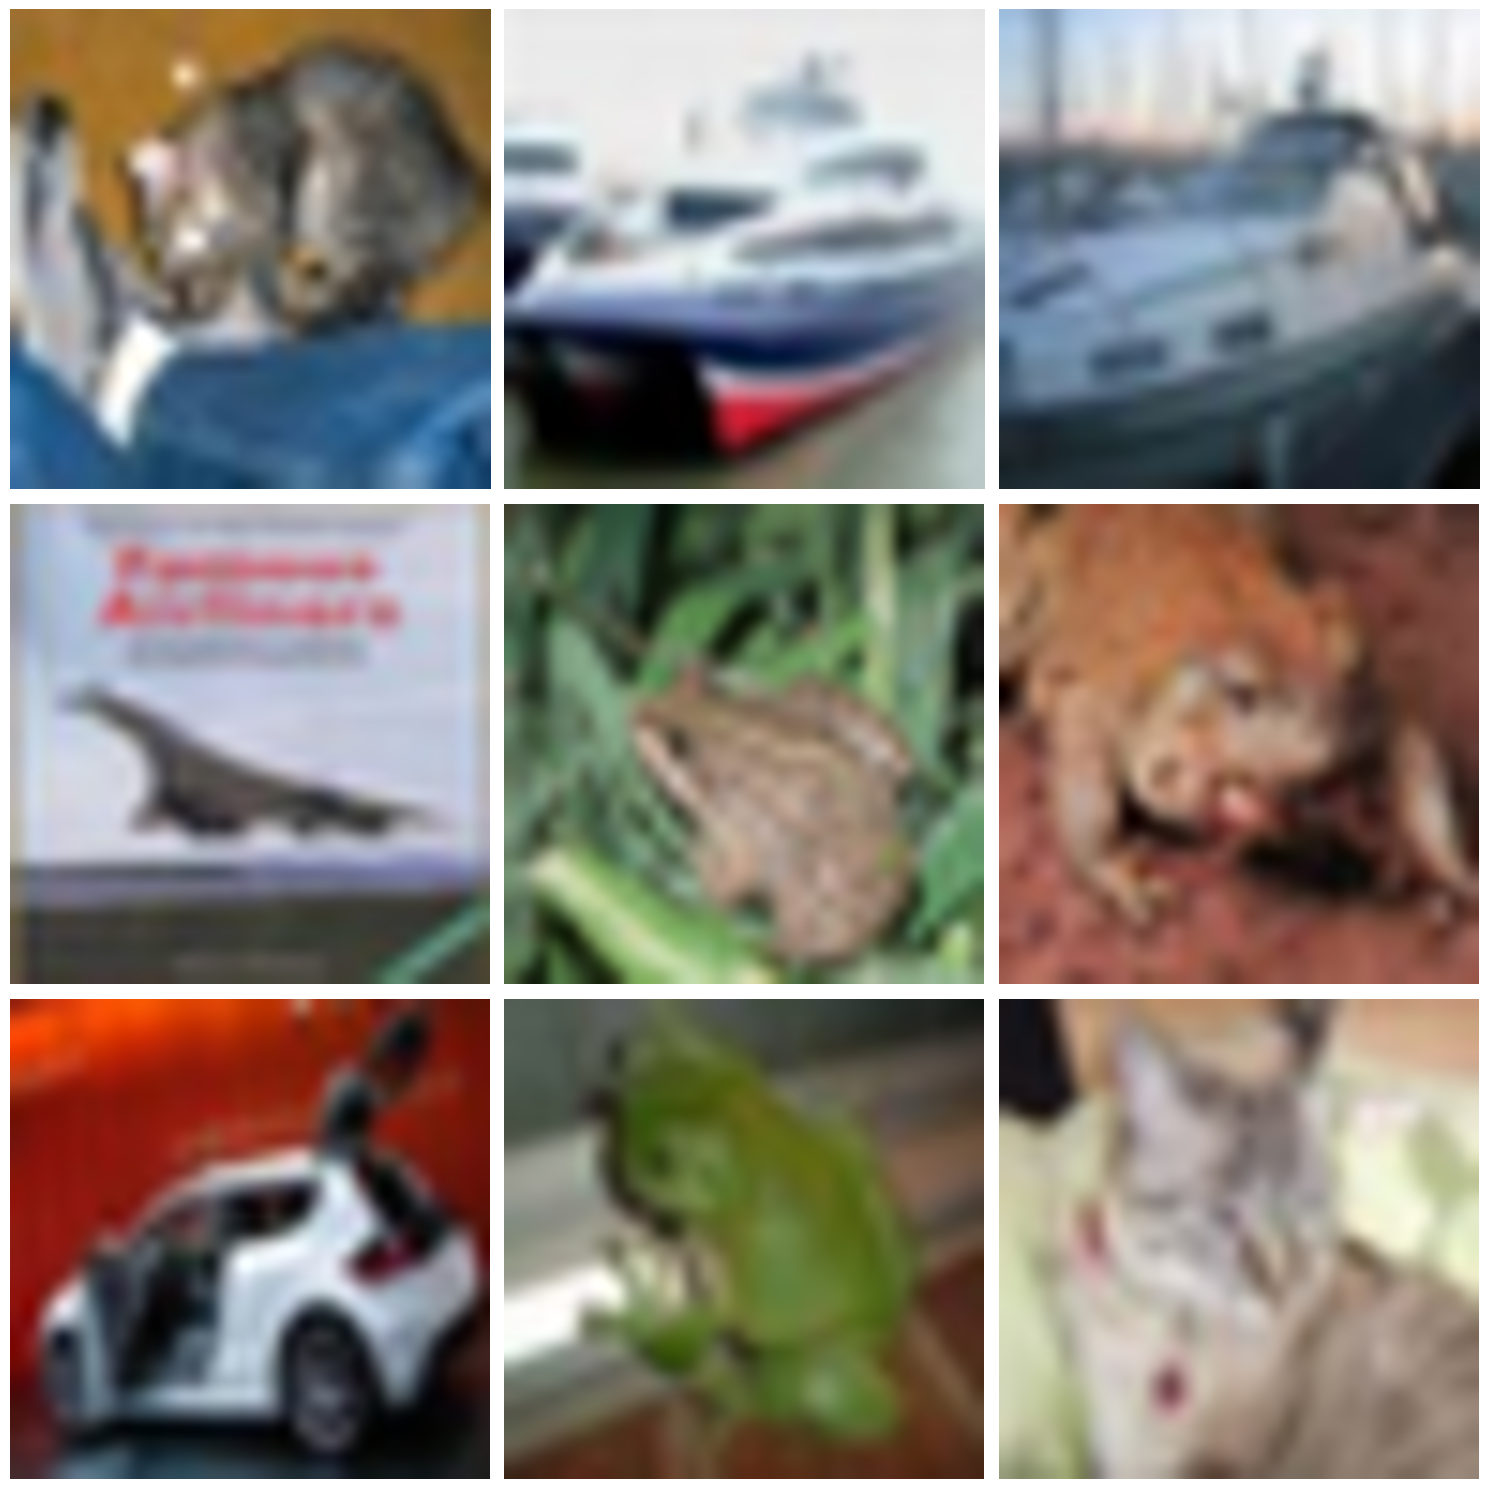

In [18]:
images = test_images
num_images = 9
rows = 3
cols = 3

plt.figure(figsize=(15, 15), dpi=100)
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i], interpolation='spline16')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [26]:
probabilities = tf.nn.softmax(predictions[i]).numpy()

In [27]:
pred_label = np.argmax(predictions[i])
true_label = test_labels[i][0]

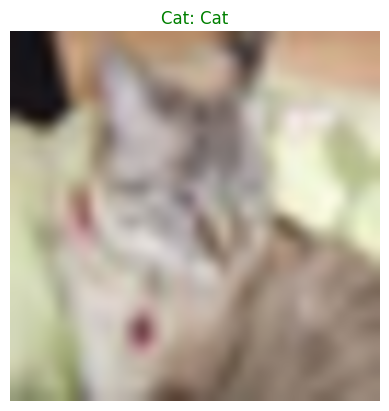

In [28]:
color = 'green' if pred_label == true_label else 'red'

plt.imshow(test_images[i], interpolation='spline16')
plt.title(f"{class_names[pred_label]}: {class_names[true_label]}", color=color, fontsize=12)
plt.axis('off')
plt.show()

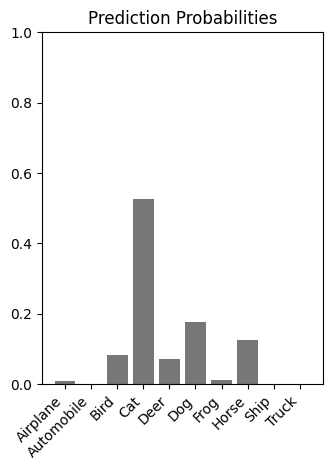

In [29]:
plt.subplot(1, 2, 2)
plt.bar(range(10), probabilities, color='#777777')
plt.ylim([0, 1])
plt.xticks(range(10), class_names, rotation=45, ha='right')
plt.title("Prediction Probabilities")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


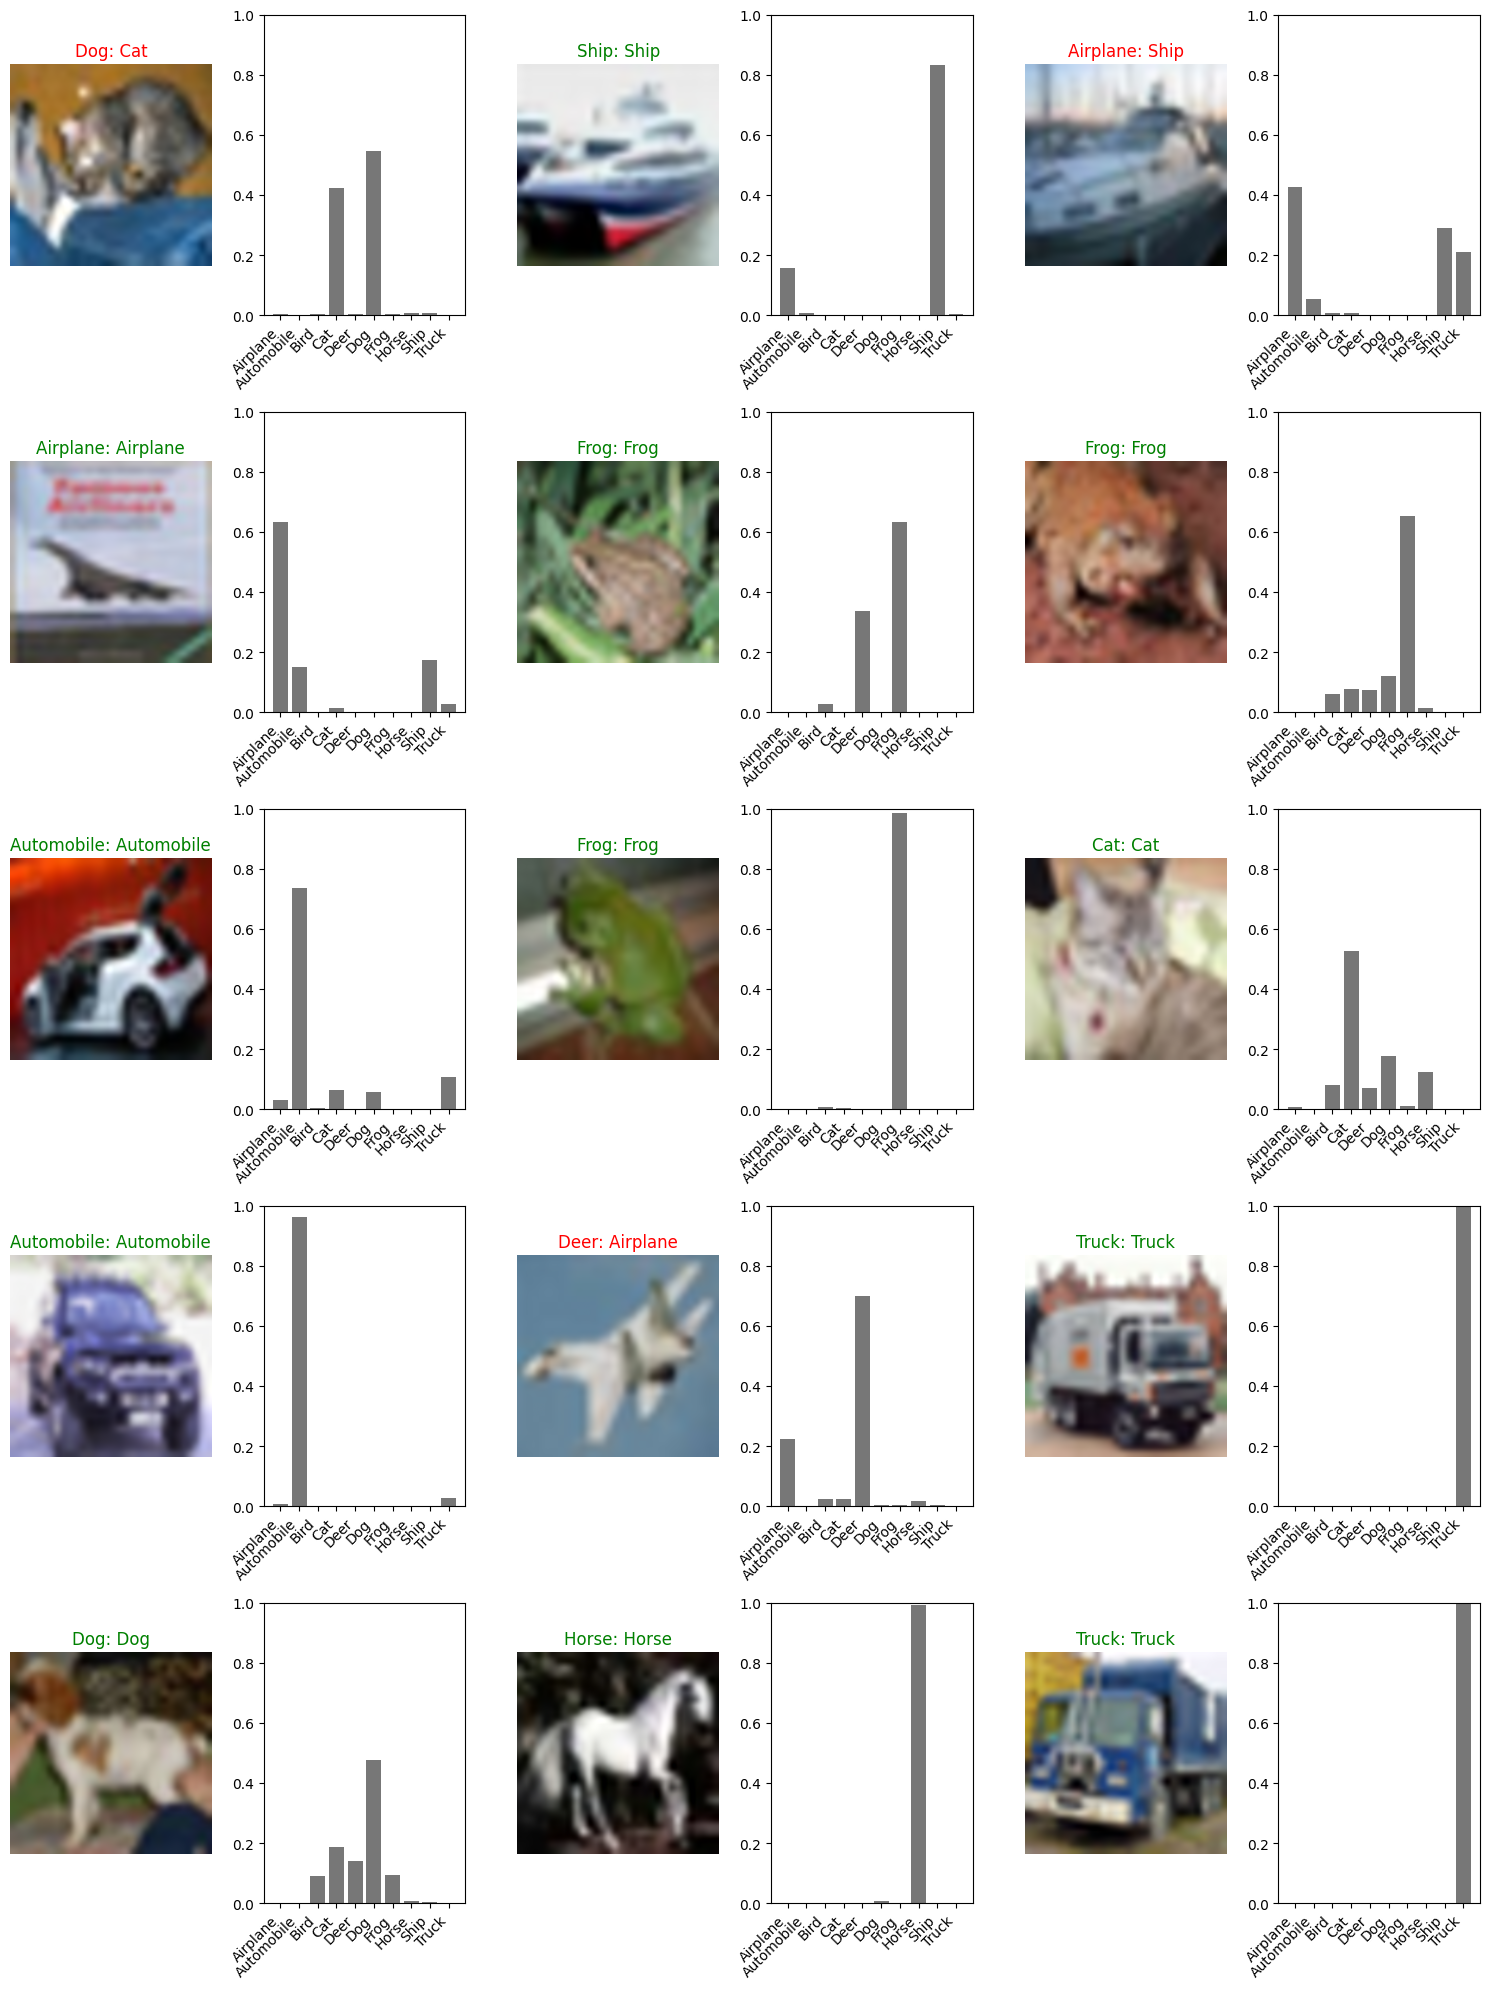

In [30]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)
plot_predictions(test_images, test_labels, predictions, class_names)